# NFL Sports Betting Analysis: Betting for Starters
## Stadium Type Analysis, By Justin Butler

For my section of our project, I chose to analyze how betting on an NFL game may be affected by the type of stadium the games are played in. Whether games played indoors in dome style stadiums are approached differently than games played outdoors in open-air style stadiums. Considering that harsher weather generally plays a factor on games by making it harder for teams to score. For e.g.: High wind speeds making it harder for the quarterbacks to throw to their receivers or more difficult for kickers to kick field goals and extra points after touchdowns.  From this topic I will analyze our group’s acquired data from the 2013 to 2023 NFL seasons and pose two more precise questions and in my conclusion make a recommendation on how I would bet on a future NFL game. Now let’s get into the data! 

In [3]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import warnings
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

#ignore warning messages
warnings.filterwarnings("ignore")

In [4]:


#reset view paramaters for output
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

# File to Load (Remember to Change These)
nfl_data = Path("output_data/nfl.csv")
stadium_data = Path("output_data/stadiums.csv")
bet_data_df = pd.read_csv(nfl_data)
#stadium_df = pd.read_csv(stadium_data)
#stadium_df

#print main csv file as DataaFrame, this will be data used for analysis
bet_data_df


,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,10809,9/5/2013,2013,1,False,DEN,49,27,BAL,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
1,10810,9/8/2013,2013,1,False,BUF,21,23,NE,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
2,10811,9/8/2013,2013,1,False,CAR,7,12,SEA,SEA,-3.5,45.0,Bank of America Stadium,False,87.0,7.0,48.0,NaN
3,10812,9/8/2013,2013,1,False,CHI,24,21,CIN,CHI,-3.0,42.0,Soldier Field,False,77.0,13.0,79.0,NaN
4,10813,9/8/2013,2013,1,False,CLE,10,23,MIA,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,13511,1/22/2023,2022,Division,True,BUF,10,27,CIN,BUF,-6.0,48.5,Highmark Stadium,False,32.0,4.0,100.0,snow
2703,13512,1/22/2023,2022,Division,True,SF,19,12,DAL,SF,-3.5,46.5,Levi's Stadium,False,55.0,19.0,47.0,NaN
2704,13513,1/29/2023,2022,Conference,True,KC,23,20,CIN,KC,-1.5,48.0,GEHA Field at Arrowhead Stadium,False,22.0,13.0,55.0,NaN
2705,13514,1/29/2023,2022,Conference,True,PHI,31,7,SF,PHI,-2.5,45.5,Lincoln Financial Field,False,52.0,14.0,48.0,rain


In [5]:
stadium_list_df = pd.DataFrame(bet_data_df["stadium"])
stadium_list_df


,stadium
0,Sports Authority Field at Mile High
1,Ralph Wilson Stadium
2,Bank of America Stadium
3,Soldier Field
4,FirstEnergy Stadium
...,...
2702,Highmark Stadium
2703,Levi's Stadium
2704,GEHA Field at Arrowhead Stadium
2705,Lincoln Financial Field


In [6]:
# Use value counts to find all stadiums in the Data to filter for indoor/outdoor
#set option to show all stadiums and print new 
pd.set_option('display.max_rows', None)

print(bet_data_df.stadium.value_counts())

MetLife Stadium                        163
Gillette Stadium                        91
Lambeau Field                           87
Lincoln Financial Field                 87
Bank of America Stadium                 85
M&T Bank Stadium                        83
FedEx Field                             83
Raymond James Stadium                   83
Arrowhead Stadium                       83
Lucas Oil Stadium                       83
Ford Field                              83
Soldier Field                           82
FirstEnergy Stadium                     80
Heinz Field                             77
Levi's Stadium                          77
Nissan Stadium                          75
Paul Brown Stadium                      75
CenturyLink Field                       70
Sports Authority Field at Mile High     69
University of Phoenix Stadium           67
U.S. Bank Stadium                       60
SoFi Stadium                            53
NRG Stadium                             52
Oakland Col

In [7]:
#ensure DF outputs correctly
pd.reset_option('all')

#created new DF with desired columns
filtered_stadium_df = bet_data_df[["schedule_date", "schedule_season", "team_home", "score_home", "score_away", "team_away", 
                                   "team_favorite_id", "spread_favorite", "over_under_line", 
                                   "stadium", "weather_temperature",	"weather_wind_mph",	"weather_humidity" ]].copy()

#add new columns for game winner and stadium type
filtered_stadium_df["game_winner"] = ""
filtered_stadium_df["stadium_type"] = ""

#re-order columns in desired order
final_stadium_df = filtered_stadium_df[["schedule_date", "schedule_season", "team_home", "score_home", "score_away", 
                                        "team_away", "team_favorite_id", "game_winner", "spread_favorite", "over_under_line",
                                        "stadium", "stadium_type", "weather_temperature", "weather_wind_mph", "weather_humidity" ]].rename(columns={"weather_temperature":"weather_temperature(°F)",
                                        "weather_humidity":"weather_humidity(%)"})
final_stadium_df

,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature(°F),weather_wind_mph,weather_humidity(%)
0,9/5/2013,2013,DEN,49,27,BAL,DEN,,-7.5,49.5,Sports Authority Field at Mile High,,83.0,7.0,30.0
1,9/8/2013,2013,BUF,21,23,NE,NE,,-10.5,51.5,Ralph Wilson Stadium,,65.0,6.0,55.0
2,9/8/2013,2013,CAR,7,12,SEA,SEA,,-3.5,45.0,Bank of America Stadium,,87.0,7.0,48.0
3,9/8/2013,2013,CHI,24,21,CIN,CHI,,-3.0,42.0,Soldier Field,,77.0,13.0,79.0
4,9/8/2013,2013,CLE,10,23,MIA,CLE,,-2.5,40.5,FirstEnergy Stadium,,72.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1/22/2023,2022,BUF,10,27,CIN,BUF,,-6.0,48.5,Highmark Stadium,,32.0,4.0,100.0
2703,1/22/2023,2022,SF,19,12,DAL,SF,,-3.5,46.5,Levi's Stadium,,55.0,19.0,47.0
2704,1/29/2023,2022,KC,23,20,CIN,KC,,-1.5,48.0,GEHA Field at Arrowhead Stadium,,22.0,13.0,55.0
2705,1/29/2023,2022,PHI,31,7,SF,PHI,,-2.5,45.5,Lincoln Financial Field,,52.0,14.0,48.0


To answer my questions I first used the value.counts() function on the stadium column, which contained the names of all the stadiums played in over the past 10 years to get the full stadium list so I could later filter it by indoor and outdoor and place these values in a newly created column “stadium_type”.  I used the following for loop to achieve the desired result:

In [8]:
# indoor(dome) stadiums are: "Lucas Oil Stadium", "Ford Field", "University of Phoenix Stadium", "U.S. Bank Stadium", "SoFi Stadium", "NRG Stadium", "AT&T Stadium", "Georgia Dome", "Mercedes-Benz Superdome",
# "Mercedes-Benz Stadium", "Reliant Stadium", "Louisiana Superdome", "Allegiant Stadium", "Edward Jones Dome", "State Farm Stadium", "Caesars Superdome", "Mall of America Field", "Rogers Centre"

# Eg: if stadium value is equal to any of the above then stadium_type = Indoor, else = Outdoor

# For loop to set Indoor & Outdoor Stadiums in stadium column and append to new "type" column
stadiums = final_stadium_df["stadium"]
stadium_list = []

for stadium in stadiums:

    if stadium in ["Lucas Oil Stadium", "Ford Field", 
                   "University of Phoenix Stadium", "U.S. Bank Stadium", 
                   "SoFi Stadium", "NRG Stadium", "AT&T Stadium", 
                   "Georgia Dome", "Mercedes-Benz Superdome",
                    "Mercedes-Benz Stadium", "Reliant Stadium", "Louisiana Superdome",
                    "Allegiant Stadium", "Edward Jones Dome", "State Farm Stadium", 
                    "Caesars Superdome", "Mall of America Field", "Rogers Centre"]:
        
    
    #THEN print/output Indoor in stadium_type column, if not print/output Outdoor
        stadium_list.append("Indoor")
    else:
        stadium_list.append("Outdoor")

final_stadium_df["stadium_type"]=stadium_list
final_stadium_df

,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature(°F),weather_wind_mph,weather_humidity(%)
0,9/5/2013,2013,DEN,49,27,BAL,DEN,,-7.5,49.5,Sports Authority Field at Mile High,Outdoor,83.0,7.0,30.0
1,9/8/2013,2013,BUF,21,23,NE,NE,,-10.5,51.5,Ralph Wilson Stadium,Outdoor,65.0,6.0,55.0
2,9/8/2013,2013,CAR,7,12,SEA,SEA,,-3.5,45.0,Bank of America Stadium,Outdoor,87.0,7.0,48.0
3,9/8/2013,2013,CHI,24,21,CIN,CHI,,-3.0,42.0,Soldier Field,Outdoor,77.0,13.0,79.0
4,9/8/2013,2013,CLE,10,23,MIA,CLE,,-2.5,40.5,FirstEnergy Stadium,Outdoor,72.0,16.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,1/22/2023,2022,BUF,10,27,CIN,BUF,,-6.0,48.5,Highmark Stadium,Outdoor,32.0,4.0,100.0
2703,1/22/2023,2022,SF,19,12,DAL,SF,,-3.5,46.5,Levi's Stadium,Outdoor,55.0,19.0,47.0
2704,1/29/2023,2022,KC,23,20,CIN,KC,,-1.5,48.0,GEHA Field at Arrowhead Stadium,Outdoor,22.0,13.0,55.0
2705,1/29/2023,2022,PHI,31,7,SF,PHI,,-2.5,45.5,Lincoln Financial Field,Outdoor,52.0,14.0,48.0


In [21]:
#for loop to itterate through score columns to calculate game winner
# Eg: if score_home > score_away then team_home is the game winner else team_away winner ?
for index, row in final_stadium_df.iterrows():
    
    if row["score_home"] > row["score_away"]:
        final_stadium_df.loc[index, "game_winner"] = row["team_home"]

    else:
        final_stadium_df.loc[index, "game_winner"] = row["team_away"]



In [10]:
#create home_team_won column using 1 = home team won game, 0 = loss (away team won)
final_stadium_df["home_team_won"] = final_stadium_df.apply(lambda row: int(row["team_home"] == row["game_winner"]), axis=1)

#new df to include column in desired order
winner_stadium_df = final_stadium_df[["schedule_date", "schedule_season", "team_home", "score_home", "score_away", "team_away", "team_favorite_id", 
                                        "game_winner", "home_team_won", "spread_favorite", "over_under_line", "stadium", "stadium_type", "weather_temperature(°F)", "weather_wind_mph", "weather_humidity(%)" ]] 
                                        

winner_stadium_df.to_csv("output_data/Justin_nfl.csv")
winner_stadium_df.sample(20)


,schedule_date,schedule_season,team_home,score_home,score_away,team_away,team_favorite_id,game_winner,home_team_won,spread_favorite,over_under_line,stadium,stadium_type,weather_temperature(°F),weather_wind_mph,weather_humidity(%)
1684,10/13/2019,2019,DEN,16,0,TEN,DEN,DEN,1,-1.5,41.0,Sports Authority Field at Mile High,Outdoor,NaN,NaN,NaN
2164,9/19/2021,2021,NYJ,6,25,NE,NE,NE,0,-5.5,42.5,MetLife Stadium,Outdoor,NaN,NaN,NaN
1588,12/30/2018,2018,TB,32,34,ATL,ATL,ATL,0,-2.5,51.5,Raymond James Stadium,Outdoor,80.0,5.0,NaN
1987,11/2/2020,2020,NYG,23,25,TB,TB,TB,0,-12.5,45.0,MetLife Stadium,Outdoor,NaN,NaN,NaN
920,10/31/2016,2016,CHI,20,10,MIN,MIN,CHI,1,-4.5,39.5,Soldier Field,Outdoor,57.0,3.0,NaN
2691,1/8/2023,2022,SF,38,13,ARI,SF,SF,1,-14.5,40.0,Levi's Stadium,Outdoor,NaN,NaN,NaN
1982,11/1/2020,2020,GB,22,28,MIN,GB,MIN,0,-6.5,50.0,Lambeau Field,Outdoor,NaN,NaN,NaN
914,10/30/2016,2016,DAL,29,23,PHI,DAL,DAL,1,-5.0,44.0,Cowboys Stadium,Outdoor,72.0,0.0,NaN
2503,10/13/2022,2022,CHI,7,12,WAS,WAS,WAS,0,-1.0,38.0,Soldier Field,Outdoor,NaN,NaN,NaN
289,9/14/2014,2014,GB,31,24,NYJ,GB,GB,1,-7.0,46.5,Lambeau Field,Outdoor,63.0,11.0,NaN


## ANALYSIS OVER HOW INDOOR VS. OUTDOOR STADIUMS AFFECTS OVER/UNDER LINE
### Question 1)  Is stadium type, being either indoor or outdoor factored in when the over/under line is set for games ?  

In [11]:
# Analysis to see difference of weather between indoor and outdoor stadiums
#summary statistics table for weather metrics of indoor vs. outdoor stadiums 
weather_agg = winner_stadium_df.groupby(["stadium_type"])[["weather_temperature(°F)", "weather_wind_mph", "weather_humidity(%)"]
                                                          ].agg(["mean", "median", "var", "std", "sem"], skipna=False)
weather_agg

# 71.94(°F) is 22.18 Celsius, 57.94(°F) is 14.411 celsius

weather_temperature(°F)                                          \
                                mean median         var        std       sem   
stadium_type                                                                   
Indoor                     71.946252   72.0    9.195407   3.032393  0.114045   
Outdoor                    57.946759   60.0  308.623418  17.567681  0.487991   

             weather_wind_mph                                        \
                         mean median        var       std       sem   
stadium_type                                                          
Indoor               0.308345    0.0   2.366545  1.538358  0.057856   
Outdoor              6.804633    6.0  20.345883  4.510641  0.125344   

             weather_humidity(%)                                          
                            mean median         var        std       sem  
stadium_type                                                              
Indoor                 67.222222   75.0  675.694444  25.994123  8.664708  
Outdoor                62.217899   63.0  376.139835  19.394325  1.209785

The table supports the idea that the weather in outdoor stadiums is much harsher and unpredictable than indoor stadiums with such high statistic measurements such as variance and standard deviation. With an outdoor temperature variance 30 times greater than indoor temperatures, a standard deviation almost 6 times greater than indoor, outdoor wind speed variance almost 10 times greater than indoor and standard deviation almost 3 times greater, the analysis clearly shows tremendous variability and value spread across the data. Meaning the overall weather at outdoor stadiums can be significantly different than indoor stadiums due to changing weather condition, time of year and geography. 

In [12]:

#calculate average over/under line for indoor vs. outdoor stadiums 
average_over_under_indoor = winner_stadium_df[winner_stadium_df['stadium_type'] == 'Indoor']['over_under_line'].dropna().mean()
average_over_under_outdoor = winner_stadium_df[winner_stadium_df['stadium_type'] == 'Outdoor']['over_under_line'].dropna().mean()

print("Average Over-Under Line for Indoor Stadiums:", average_over_under_indoor)
print("Average Over-Under Line for Outdoor Stadiums:", average_over_under_outdoor)

Average Over-Under Line for Indoor Stadiums: 47.04834254143646
Average Over-Under Line for Outdoor Stadiums: 45.27534039334342


To see how the stadium type affects a betting measure such as over/under I again used the groupby() and aggregation  (agg([“mean”, “median”, “var”, “std”, “sem”]) functions to analyze the over/under line of each game against the stadium type. To produce the following summary statistics table:

In [13]:
#summary statistics table for over/under line by indoor and outdoor games
over_under_agg = winner_stadium_df.groupby(["stadium_type"])[["over_under_line"]].agg(["mean", "median", "var", "std", "sem"])
over_under_agg

over_under_line                                      
                        mean median        var       std       sem
stadium_type                                                      
Indoor             47.048343   47.0  19.314396  4.394815  0.163332
Outdoor            45.275340   45.0  17.597711  4.194963  0.094203

To visualize the data between these 2 columns and the summary table I chose a box-and-whisker plot for its ability to mean, quartiles, outliers and overall potential skew of the data. Seen below:

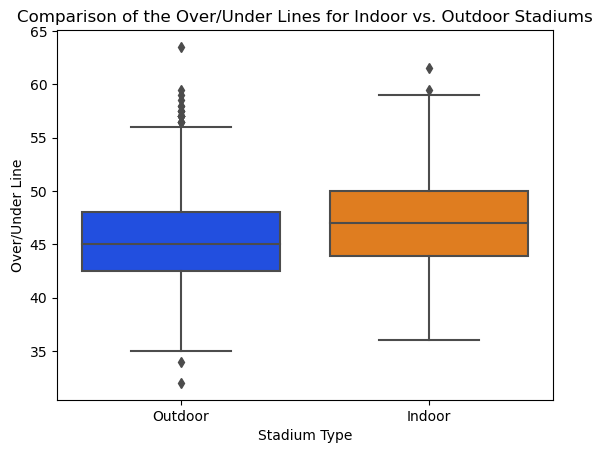

In [14]:
# plot above data into box and whisker plot 

import seaborn as sns
sns.set_palette("bright")

ax= sns.boxplot(data=winner_stadium_df, x="stadium_type", y="over_under_line")

ax.set(xlabel='Stadium Type', ylabel='Over/Under Line', title="Comparison of the Over/Under Lines for Indoor vs. Outdoor Stadiums")

plt.savefig("output_data\overunder_by_stadium.png")
plt.show()


Once plotted I was able to see what was also displayed by the weather summary statistics table, a much higher degree of spread in the Outdoor values than the Indoor values. Shown in one example, with the much higher amount of outliers in the Outdoor values than the Indoor Values. This finding makes sense in connection with the weather analysis: much more variability in the potential weather during Outdoor games would mean much more variability in over/under lines set for Outdoor games.

To test my hypotheses, I performed an independent 2-sample T-test as I was comparing 2 distinct groups, the over/under lines of games played indoor versus those of games played outdoors. 

In [15]:
# Perform Independent T-test to test Alternate Hypothesis

# Perform independent t-test
indoor_lines = winner_stadium_df[winner_stadium_df["stadium_type"] == "Indoor"]["over_under_line"]
outdoor_lines = winner_stadium_df[winner_stadium_df["stadium_type"] == "Outdoor"]["over_under_line"]

t_statistic, p_value = stats.ttest_ind(indoor_lines, outdoor_lines)

# Print the t-test results
print("Independent Two-Sample T-test Results:")
print("======================================")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Independent Two-Sample T-test Results:
t-statistic: 9.609003843346978
p-value: 1.6094736737939994e-21


## ANALYSIS OF HOME GAMES WON BY TEAMS WITH INDOOR STADIUMS VS. OUTDOOR STADIUMS

In [16]:

#print total number of games played at indoor and outdoor stadiums
print(final_stadium_df.groupby("stadium_type")["home_team_won"].count())

#print total games won by home teams in indoor stadiums and games won by home teams in outdoor stadiums
print(final_stadium_df.groupby("stadium_type")["home_team_won"].sum())

#print percenatage of 
final_stadium_df.groupby("stadium_type")["home_team_won"].sum() / final_stadium_df.groupby("stadium_type")["home_team_won"].count()

stadium_type
Indoor      724
Outdoor    1983
Name: home_team_won, dtype: int64
stadium_type
Indoor      390
Outdoor    1112
Name: home_team_won, dtype: int64


stadium_type
Indoor     0.538674
Outdoor    0.560767
Name: home_team_won, dtype: float64

In [17]:
# Store the above output as a clean DF
# Group by "stadium_type" and calculate the count of games played
games_played = final_stadium_df.groupby("stadium_type")["home_team_won"].count()

# Convert the count to a DataFrame
games_played_df = pd.DataFrame({"Total Games Played": games_played})

# Group by "stadium_type" and calculate the sum of games won by home teams
games_won = final_stadium_df.groupby("stadium_type")["home_team_won"].sum()

# Make the sum to a DataFrame
games_won_df = pd.DataFrame({"Games Won by Home Teams": games_won})

# Percentage of games won by home teams
percentage_won = games_won / games_played

# Convert the percentage series to a DataFrame
percentage_won_df = pd.DataFrame({"Percentage of Games Won": percentage_won})

# Print the DataFrame
percentage_won_df
# group all DataFrames into one output
indoor_outdoor_df = pd.concat([games_played_df, games_won_df, percentage_won_df], axis=1)
indoor_outdoor_df

,Total Games Played,Games Won by Home Teams,Percentage of Games Won
stadium_type,,,
Indoor,724,390,0.538674
Outdoor,1983,1112,0.560767


To visualize this data, I chose a simple bar plot. I felt this was the best choice as the 2 vertical bars this would create, one displaying the percentage of home games won by NFL teams whose home field is Indoors and the other showing home games won by NFL teams whose home fields are outdoors, would allow for easy visual comparison of the percentage values, thus any potential conclusions could be easily drawn.

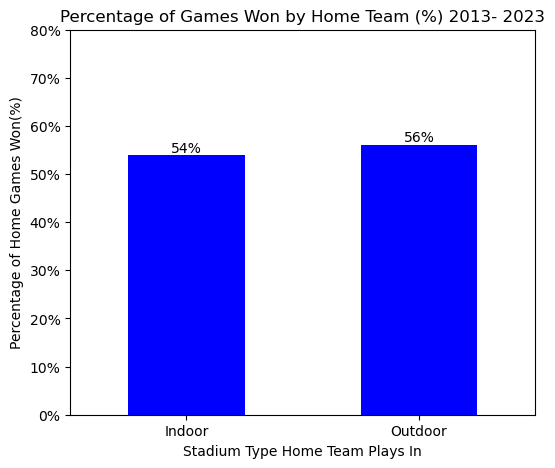

In [18]:
#create pie plot to visualize indoor/outdoor adavantage 
import matplotlib.ticker as mtick

home_field_data = final_stadium_df.groupby("stadium_type")["home_team_won"].sum() / final_stadium_df.groupby("stadium_type")["home_team_won"].count()


home_field_data.plot(kind="bar", figsize=(6,5), ylim=(0,.8), color="blue")
plt.xlabel("Stadium Type Home Team Plays In")
plt.title("Percentage of Games Won by Home Team (%) 2013- 2023")
plt.ylabel("Percentage of Home Games Won(%)")
plt.xticks(rotation='horizontal')

# Create a function to format the y-axis as percentages
def percentage_format(x, _):
    return '{:.0f}%'.format(x * 100)

#Apply the percentage format to the y-axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(percentage_format))

# Add actual percentges to the bars
for i, value in enumerate(home_field_data):
    plt.annotate(f'{value:.0%}', (i, value), ha='center', va='bottom')

ax.set_ylim([0,70])
#save plot in output folder
plt.savefig("output_data\homegames_by_stadiumtype.png")

plt.show()

Important to note that most teams in the NFL play in Outdoor Stadiums. Only 10/32 teams have Indoor Stadiums for their home fields. This can be reflected in the data as 1983 of the 2707 games in my groups data were played in Outdoor stadiums over the past 10 seasons. Even still, the bar plot shows a very even playing field (no pun intended) over the past 10 seasons worth of games. With game data recorded over thousands of games, the comparison of the 2 values reveals almost identical percentages at 54 and 56 respectively. The data and subsequent bar plot shows more of a skew towards home teams in general having an advantage than an advantage to the stadium type the home teams play in. As the corresponding data to these figures would mean 46% of teams have lost their away games that they played indoors and 44% of away teams have lost games played in Outdoor stadiums. Therefore, I must conclude that I see no correlation towards a home field advantage for either home stadium. The slight 2% higher value for the Outdoor stadium teams can be nullified by the fact that there have been 2.73 times more Outdoor games than Indoor games over the past 10 seasons. 


## CONCLUSION & LIMITATIONS:
After all this analysis, I believe I can make some modest recommendations towards placing a bet on an NFL game based on the stadium type the game is played in. Firstly, I would advise betting on the over/under line opposed to placing in on one team to win over the other. Based on some positive correlation results towards over/under line based on stadium type. Whereas no real correlation was found on a home field advantage. When making your bet I would look for 2 things based on my findings. Expected weather for the game and corresponding stadium type. Based on the extreme variability I uncovered with the weather of outdoor NFL games and the data I found on average over/under lines. I would look for games with poor expected weather that will be played outdoors and bet the under on the over/under line. Meaning the total points scored between the two teams will be under the set over/under number.

Some limitations to my analysis include:
•	Overall data limitations, I originally chose to examine growth in the NFL betting industry and was going to try to predict future growth in the market based on my findings. Although I was unable to find any accessible or clean data. 
•	Data limitations in the data used. Several rows in the weather columns possessed Nan values and limited the scope of this section of data. For ex: more data in the “weather_detail” column such as rainy or sunny could have allowed for more in depth analysis. E.g. average score for games labeled as rainy vs. sunny. 
•	Ability/Time constraints. Due to the need to change project topics, a few days were lost at the beginning of the project timeline. As well, my experience in Data Analytics limited my ability to analyze our csv data, or any data for that matter, at a more detailed level. In the future with more skills such as “scrapping” more detailed data from multiple sources would likely be available, thus allowing for a more detailed analysis.


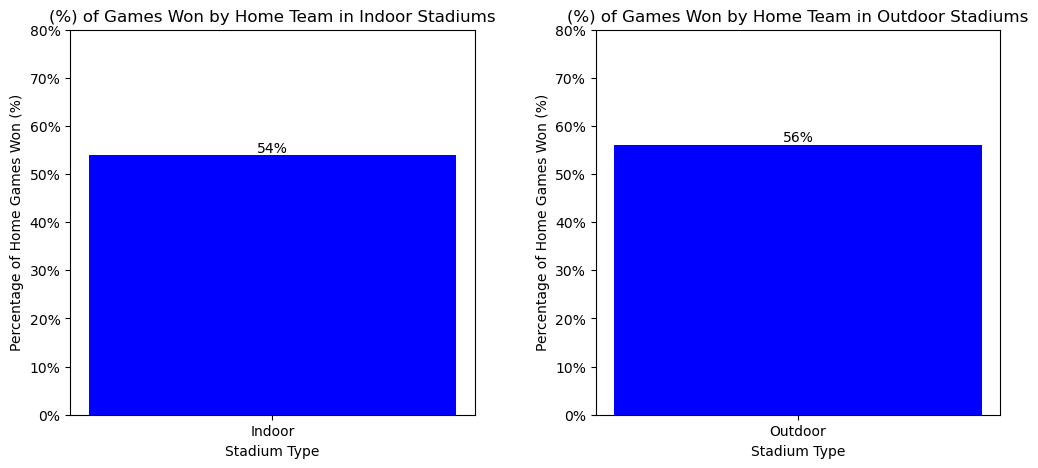

In [19]:
# TEST PLOT ONLY, not used for final project

# Filter data for indoor and outdoor stadiums
indoor_data = home_field_data[home_field_data.index == "Indoor"]
outdoor_data = home_field_data[home_field_data.index == "Outdoor"]

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for indoor stadiums
ax1.bar(indoor_data.index, indoor_data, color="blue", width=0.3)
ax1.set_xlabel("Stadium Type")
ax1.set_ylabel("Percentage of Home Games Won (%)")
ax1.set_title("(%) of Games Won by Home Team in Indoor Stadiums")
ax1.set_ylim([0, 0.8])
ax1.xaxis.set_tick_params(rotation=0)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Add actual percentage to the bar
value = indoor_data[0]
ax1.annotate(f'{value:.0%}', (0, value), ha='center', va='bottom')

# Plot for outdoor stadiums
ax2.bar(outdoor_data.index, outdoor_data, color="blue")
ax2.set_xlabel("Stadium Type")
ax2.set_ylabel("Percentage of Home Games Won (%)")
ax2.set_title("(%) of Games Won by Home Team in Outdoor Stadiums")
ax2.set_ylim([0, 0.8])
ax2.xaxis.set_tick_params(rotation=0)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Add actual percentage to the bar
value = outdoor_data[0]
ax2.annotate(f'{value:.0%}', (0, value), ha='center', va='bottom')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Save plot in the output folder
# plt.savefig("output_data/homegames_by_stadiumtype.png")

# Display the plot
plt.show()